# The Discrete Fourier Transform

The following  exercise covers the basis of the discrete Fourier transformation and the inverse Fourier transformation. The aim is to do this without the use of complex numbers and to graphically illustrate each step. The role of the Fourier transform is to decompose the signal  in  to  a  set  of  basis  functions  defined  by  sines  and  cosines.  Each  of  these  basis  functions  is  associated  with  a  coefficient.  This  allows  for  reconstructing  or  synthesizing  the original signals using the inverse Fourier transform. 

The steps allow for calculating the power spectrum as well as constructing low-, high- and bandpass filters. 

Please go through the exercises step-by-step and answer the questions.

Note the plots are made to commands using '#' . Remove the '#' to show plots.


First import the relevant modules: 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## The test signal

The sampling frequency is set to 2048 Hz:

In [2]:
Fs = 2048

Now define the test signal to be analyzed. The signal will have N = 2048 samples, i.e. it is 1 s long.
Following a flat signal of 0.5 s (first 1024 sample), there is a f0 = 
10 Hz signal turning on lasting for 0.5 s. 

In [6]:
f0 = 10

t = np.arange(0, 1,1/Fs)
s = np.sin(2*np.pi*f0*t + 1.0)
s1 = np.sin(2*np.pi*f0*t + 5)  # this 5 will move the signal 5/(2*np.pi) radians to right 

N = 2048
s[0:int(N/2)-1] = -1
s1[0:int(N/2)-1] = -1

Add some Gaussian noise with a standard deviation of 0.2:

In [7]:
s = s + np.random.normal(0, 0.2 , size = s.shape)
s1 = s1 + np.random.normal(0, 0.2, size=s.shape)

and plot the signal: 

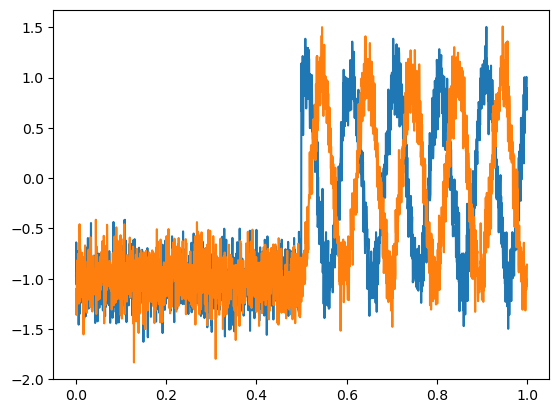

In [8]:
plt.plot(t,s)
plt.plot(t,s1)

Note that the signal starts at -1 (a 'DC shift')

### Question 1:
- a) What does the number 1.0 inside the sin expression do (try to change it)? 1 is phi = phase 
- b) What is the units of that number? radian
phase of a sin wave is calculated as: arctan(cosine(2*pi*f*t) / sin(2*pi*f*t))

## Define that basis functions for the discrete Fourier transform

Allocate memory to save computational time later:

In [11]:
baseCos = np.zeros((1+int(N/2),N))
baseSin = np.zeros((1+int(N/2),N))
print(baseCos.shape)

(1025, 2048)


Now define the cosine and sine basis functions:

In [34]:
ind = np.arange(0, N,1)
for k in range(1+int(N/2)):
    baseCos[k,:] = np.cos(2*np.pi*k*ind/N)  # we have a time series (2048) of \
                                            # cos(2*pi*f*t) for each frequency
    baseSin[k,:] = np.sin(2*np.pi*k*ind/N)
print(np.max(k))
print(baseCos.shape)

1024
(1025, 2048)


### Question 2:
- What is the role of the variable k? k is frequency of the wave

In order to study the basis functions, plot the first 4:

Text(0.5, 1.0, 'k=40')

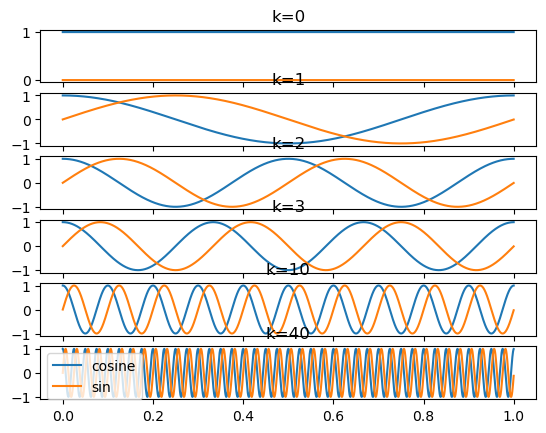

In [26]:
plt.subplot(6,1,1)
plt.plot(t,baseCos[0,:],t,baseSin[0,:]);plt.title("k=0")
plt.subplot(6,1,2)
plt.plot(t,baseCos[1,:],t,baseSin[1,:]);plt.title("k=1")
plt.subplot(6,1,3)
plt.plot(t,baseCos[2,:],t,baseSin[2,:]);plt.title("k=2")
plt.subplot(6,1,4)
plt.plot(t,baseCos[3,:],t,baseSin[3,:]);plt.title("k=3")
plt.subplot(6,1,5)
plt.plot(t,baseCos[10,:],t,baseSin[10,:]);plt.title("k=10")
plt.subplot(6,1,6)
plt.plot(t, baseCos[40,:], label="cosine")
plt.plot(t, baseSin[40,:], label="sin")
plt.legend()
plt.title("k=40")


### Question 3:
- a. How many cycles do you observed for k = 0, 1, 2 and 3? 0, 1, 2, and 3 cycles in 1 second
- b. What is the phase difference between the cos and sin functions in units of degrees and radians? np.pi/2 or 90 degrees
- c. plot the the basis function for k = 10. 

## Calculate the coefficients of the Fourier transform
The  following  step is  the  core  of the  Fourier transform. It calculates  the Fourier 
coefficient with respect to each basis function. This is simply done by calculating the dot-product between the signal and the individual basis functions:

In [29]:
Re = np.zeros(1+int(N/2))  # real part
Im = np.zeros(1+int(N/2))  # imaginary part

for k in range(1+int(N/2)):
    Re[k] =  np.dot(s ,baseCos[k,:]) 
    Im[k] =  np.dot(s ,baseSin[k,:])
    
print(Re.shape)

(1025,)


Rescale coefficients according to vector lenght N:
(What did we do here?)

In [31]:
Re = Re/int(N/2)
print(Re.shape)
Im = Im/int(N/2)
Re[0] = Re[0]/2
Re[int(N/2)] = Re[int(N/2)]/2
print(Re[0], Re[-1])

(1025,)
-0.0002452606192401977 1.826609977681503e-06


Now plot the first 20 Fourier coefficients (the real and imaginary components respectively in Blue and 
Orange):

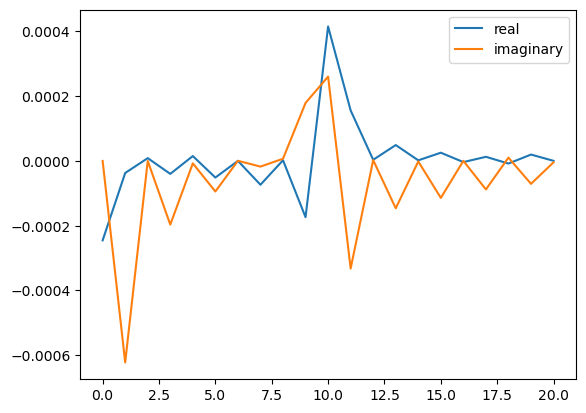

In [33]:
plt.plot(np.arange(0,21,1),Re[0:21], label="real")  # from cosine
plt.plot(np.arange(0,21,1),Im[0:21], label="imaginary")  # from sin
plt.legend()
plt.show()

### Question 4
- Around which k-values do you see the largest coefficients? – and why? 10, because f0=10

## Power spectrum

The power spectrum can be calculated by adding the squared real and imaginary values of the Fourier coefficients

Text(0, 0.5, 'Power')

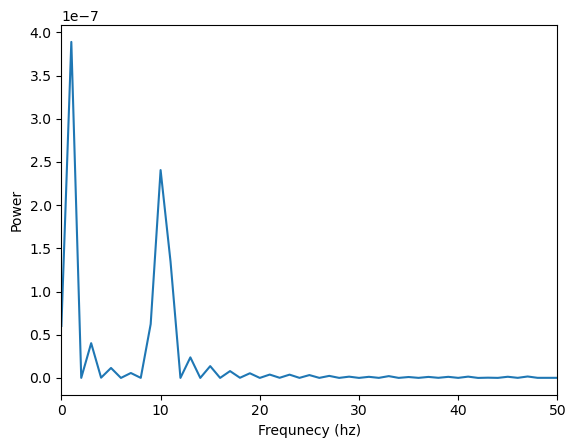

In [35]:
plt.plot(Re ** 2 + Im ** 2)
plt.xlim([0 ,50])
plt.xlabel('Frequnecy (hz)')
plt.ylabel('Power')

### Question 5

Interpret the shape of the power spectrum for the frequencies with large power. (why do we have a high power low freq?)

## The inverse Fourier transform

The  inverse  Fourier  transform  allows  for  converting  a  frequency  domain  representation 
(defined by the Fourier coefficients) back  the original signal. 
First the Fourier domain coefficients need to be rescaled in order to allow for synthesis of the original signal:

The inverse Fourier transform is calculated by multiplying the rescaled Fourier 
coefficients to the respective basis functions:

In [36]:
sR = np.zeros((1+int(N/2),N))
for k in range(1+int(N/2)):  # max is limited by Nyquist freq (Fs/2)
    sR[k,:] = Re[k] * baseCos[k,:] + Im[k] * baseSin[k,:]


The  original  signal  can  be  recreated  by  adding  together  the  individual  basis  functions 
multiplied by their respective coefficients. Before taking this step, 
observe  how  the  signal  reconstruction  improves  as  more  coefficients  are  taken  into 
account (respectively 3, 11, 16, 101 and all). 


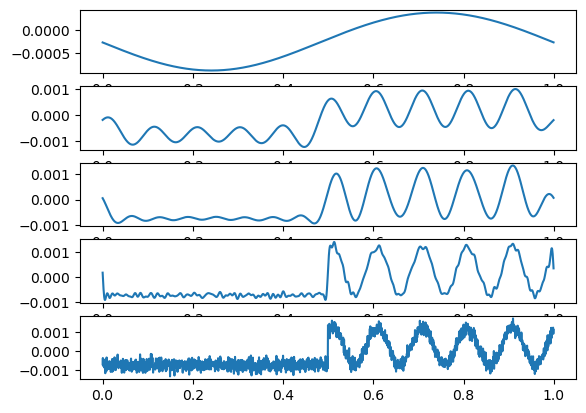

In [38]:
plt.subplot(5,1,1)
plt.plot(t,np.sum(sR[0:3,:],axis=0))
plt.subplot(5,1,2)
plt.plot(t,np.sum(sR[0:11,:],axis=0))
plt.subplot(5,1,3)
plt.plot(t,np.sum(sR[0:16,:],axis=0))
plt.subplot(5,1,4)
plt.plot(t,np.sum(sR[0:101,:],axis=0))
plt.subplot(5,1,5)
plt.plot(t,np.sum(sR[0:1024,:],axis=0))


### Question 6:
- a) What is the role of the first set of coefficients? not so sure?
- b) What is the role of the coefficient around k = 10? visualises f0
- c) What is the role of the higher coefficients? visualises noise?




Now reconstruct the orginial signals:

[-0.00070407 -0.0003768  -0.00078989 ...  0.00123084  0.00090779
  0.00111646]


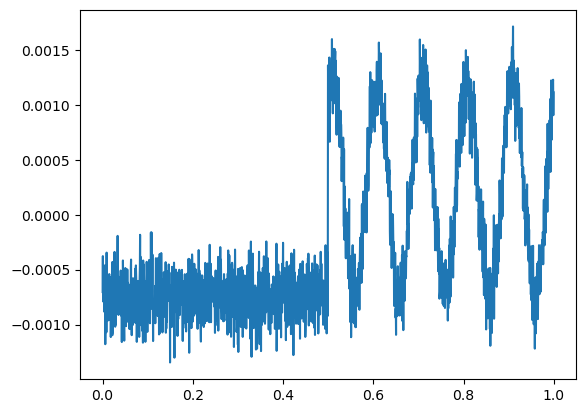

In [40]:
plt.plot(t,np.sum(sR,axis=0))
print(np.sum(sR,axis=0))

### Question 7:
- Implement a 50 Hz low pass filter based on the inverse Fourier transform. Show code and plot.

### Question 8:
- Implement a 2 Hz low pass filter based on the inverse Fourier transform. Show code and plot.

### Question 9:
- Implement a 5 - 15 Hz band pass filter based on the inverse Fourier transform/ Show code and plot.


Text(0.5, 1.0, '5-15Hz band pass')

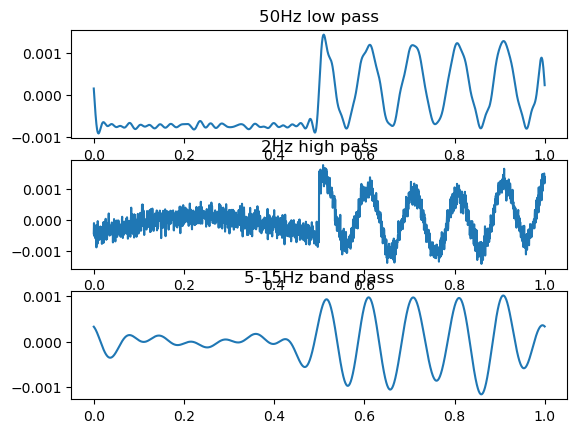

In [43]:
plt.subplot(3,1,1)
plt.plot(t,np.sum(sR[0:50,:],axis=0))
plt.title("50Hz low pass")
plt.subplot(3,1,2)
plt.plot(t,np.sum(sR[2:,:],axis=0))
plt.title("2Hz high pass")
plt.subplot(3,1,3)
plt.plot(t,np.sum(sR[5:15,:],axis=0))
plt.title("5-15Hz band pass")